<a href="https://colab.research.google.com/github/ThierrryScotto/fer_recognition_using_frequency_neural_network/blob/master/basic_FreNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import numpy as np
import tensorflow as tf
import os

os.environ['LOG_LEVEL'] = 'DEBUG'
from src.datasets import ckextended
from src.image_processing import ImagePreProcessor
from src import utils
from src.variables import *
from scipy.fftpack import dct
from matplotlib import pyplot as plt

2024-08-04 15:29:24.688488: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-04 15:29:24.696675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 15:29:24.706838: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 15:29:24.709728: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-04 15:29:24.717194: I tensorflow/core/platform/cpu_feature_guar

# Importing dataset

## Converting 1D vectors to images

In [2]:
for index, row in ckextended.iterrows():
  image = utils.convert_str_to_array(row['pixels'])
  image = utils.convert_1D_array_to_image(image, HEIGHT, WIDTH)
  utils.write_image(image, f'{OUTPUT_PATH}_{index}.png')


DEBUG:utils.py:Writing image to ./content/images/input_images/reconstructed_image_0.png
DEBUG:utils.py:Writing image to ./content/images/input_images/reconstructed_image_1.png
DEBUG:utils.py:Writing image to ./content/images/input_images/reconstructed_image_2.png
DEBUG:utils.py:Writing image to ./content/images/input_images/reconstructed_image_3.png
DEBUG:utils.py:Writing image to ./content/images/input_images/reconstructed_image_4.png
DEBUG:utils.py:Writing image to ./content/images/input_images/reconstructed_image_5.png
DEBUG:utils.py:Writing image to ./content/images/input_images/reconstructed_image_6.png
DEBUG:utils.py:Writing image to ./content/images/input_images/reconstructed_image_7.png
DEBUG:utils.py:Writing image to ./content/images/input_images/reconstructed_image_8.png
DEBUG:utils.py:Writing image to ./content/images/input_images/reconstructed_image_9.png
DEBUG:utils.py:Writing image to ./content/images/input_images/reconstructed_image_10.png
DEBUG:utils.py:Writing image to

#Image pre-processing

In [3]:
# Caminho para a pasta de entrada
input_folder = './content/images/input_images/'

# Pasta para salvar os rostos recortados
output_folder = './content/images/preprocessed_images'

image_pre_processor = ImagePreProcessor()
# Criar a pasta de saída, se não existir
os.makedirs(output_folder, exist_ok=True)

# Processar cada imagem na pasta de entrada
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        image_path = os.path.join(input_folder, filename)
        image_pre_processor.adjust_and_crop_face(image_path, output_folder)


DEBUG:image_processing.py:Loading image in dlib
DEBUG:image_processing.py:Detecting faces in image
DEBUG:image_processing.py:Processing faces in image
INFO:image_processing.py:Face 1 saved in file: ./content/images/preprocessed_images/reconstructed_image_221_face.png
DEBUG:image_processing.py:Loading image in dlib
DEBUG:image_processing.py:Detecting faces in image
DEBUG:image_processing.py:Processing faces in image
INFO:image_processing.py:Face 1 saved in file: ./content/images/preprocessed_images/reconstructed_image_71_face.png
DEBUG:image_processing.py:Loading image in dlib
DEBUG:image_processing.py:Detecting faces in image
DEBUG:image_processing.py:Processing faces in image
INFO:image_processing.py:Face 1 saved in file: ./content/images/preprocessed_images/reconstructed_image_335_face.png
DEBUG:image_processing.py:Loading image in dlib
DEBUG:image_processing.py:Detecting faces in image
DEBUG:image_processing.py:Processing faces in image
INFO:image_processing.py:Face 1 saved in file:

# DCT and CIE Layer

Getting one image of example

In [5]:
# Caminhos das imagens
image_paths = [f'./content/images/preprocessed_images/reconstructed_image_{x}_face.png' for x in range(7)]

# Lista para armazenar os arrays das imagens
image_arrays = []

# Carregar cada imagem e convertê-la em um array NumPy
for image_path in image_paths:
    if os.path.exists(image_path):
        image_array = utils.load_image(image_path)
        image_arrays.append(image_array)
    else:
        print(f"Imagem não encontrada: {image_path}")

print(len(image_arrays))

DEBUG:utils.py:Loading image ./content/images/preprocessed_images/reconstructed_image_0_face.png
DEBUG:utils.py:Loading image ./content/images/preprocessed_images/reconstructed_image_1_face.png
DEBUG:utils.py:Loading image ./content/images/preprocessed_images/reconstructed_image_2_face.png
DEBUG:utils.py:Loading image ./content/images/preprocessed_images/reconstructed_image_3_face.png
DEBUG:utils.py:Loading image ./content/images/preprocessed_images/reconstructed_image_4_face.png
DEBUG:utils.py:Loading image ./content/images/preprocessed_images/reconstructed_image_5_face.png
DEBUG:utils.py:Loading image ./content/images/preprocessed_images/reconstructed_image_6_face.png


7


**using the gamma parameter to reduce the image size**

In [6]:
γ = 0.25

def resize_dct(dct_image, gamma):
    h, w = dct_image.shape
    new_h, new_w = int(h * gamma), int(w * gamma)
    return dct_image[:new_h, :new_w]

verificando a escala das imagens

In [ ]:
# for i, image_array in enumerate(image_arrays):
#     print(f"Forma da imagem {i}: {image_array.shape}")

# # Exibir a quantidade de imagens carregadas
# print(f"Total de imagens carregadas: {len(image_arrays)}")

In [7]:
frequency_input = []

for index in range(len(image_arrays)):
    transformed_image = dct(dct(image_arrays[index].T, norm='ortho').T, norm='ortho')
    frequency_input.append(resize_dct(transformed_image, γ))
    # frequency_input.append(dct(dct(image_arrays[index].T, norm='ortho').T, norm='ortho'))

print(frequency_input[0])

[[ 3.72383526e+03 -3.44326340e+02 -2.30385754e+01  7.59917893e+00
  -8.34164493e+01  1.52066168e+01 -1.86708417e+02  1.11492957e+02
   2.91823760e+00  8.82425553e+01]
 [-2.88763986e+02 -2.82724038e+02 -9.44295291e+01 -2.82699360e+02
   1.58901081e+02 -2.21847285e+02 -2.89764579e+02 -1.85962737e+02
  -1.27069177e+02 -1.05911573e+02]
 [-1.72231264e+02  2.24352394e+02 -7.22937204e+01  1.72610862e+02
   3.09199663e+02  2.14247838e+02  8.74025587e+00  1.34367857e+02
  -3.36740512e+01  6.89095936e+01]
 [-2.58464279e+02 -5.63159564e+01 -4.42567003e+01 -1.19371493e+02
  -2.07416436e+02 -5.45476975e+01 -5.88160763e+01  9.61698285e+00
  -6.85065647e+01  4.84519084e+01]
 [ 4.31677248e+00  4.24496551e+01 -9.70223345e+01  3.30290654e+01
   5.93772803e+01  3.01244436e+01  2.75365189e+01 -3.62521198e+01
  -3.07172160e+00 -5.75987171e+01]
 [ 3.88184883e+01  7.61617415e+00 -1.27861380e+02  2.82805798e+01
  -1.88841796e+02  6.86708969e+01 -2.95374381e+01  4.91549538e+01
   4.41905735e+01  7.66645209e+01

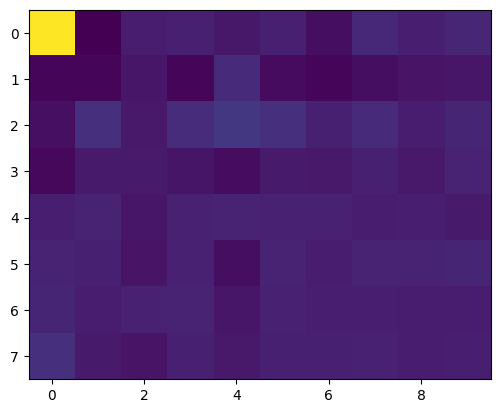

In [8]:
plt.imshow(frequency_input[0])
plt.show()

# Basic-FreNet

**Paremeters**

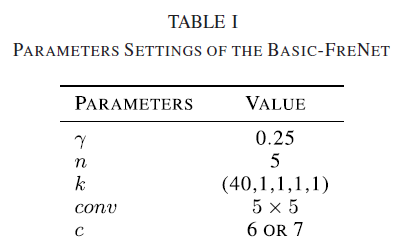

In [9]:
n = 5
k = [40, 1, 1, 1, 1]
conv = 5
c = 6

In [11]:

# Função para criar uma camada convolucional com inicialização de distribuição normal truncada
def conv_layer(input_tensor, num_filters, kernel_size, name):
    with tf.variable_creator_scope(name):
        in_channels = input_tensor.get_shape()[-1]
        weights = tf.get_variable('weights',
                                  shape=[kernel_size, kernel_size, in_channels, num_filters],
                                  initializer=tf.truncated_normal_initializer(stddev=0.1))
        biases = tf.get_variable('biases',
                                 shape=[num_filters],
                                 initializer=tf.constant_initializer(0.0))
        conv = tf.nn.conv2d(input_tensor, weights, strides=[1, 1, 1, 1], padding='SAME')
        output = tf.nn.relu(conv + biases)
    return output

# Placeholder para a entrada
# input_shape = (None, 40, 40, 1)  # Exemplo de entrada (ajustar conforme necessário)
# inputs = tf.placeholder(tf.float32, shape=input_shape)

# Camadas convolucionais conforme especificadas
conv1 = conv_layer(frequency_input, k[0], 5, 'conv1')
conv2 = conv_layer(conv1, k[1], 5, 'conv2')
conv3 = conv_layer(conv2, k[2], 5, 'conv3')
conv4 = conv_layer(conv3, k[3], 5, 'conv4')
conv5 = conv_layer(conv4, k[4], 5, 'conv5')

# Definir a sessão do TensorFlow
sess = tf.Session()

# Inicializar variáveis
sess.run(tf.global_variables_initializer())

# Exemplo de dados de entrada
input_data = np.random.random((1, 40, 40, 1))

# Fazer uma previsão
output_data = sess.run(conv5, feed_dict={inputs: input_data})
print("Output shape:", output_data.shape)


AttributeError: 'list' object has no attribute 'get_shape'

In [ ]:
# Definindo a função de inicialização com distribuição normal truncada
def truncated_normal_init(shape, dtype=None):
    return tf.random.truncated_normal(shape, stddev=0.1, dtype=dtype)

# Parâmetros do modelo
n = 5
k = [40, 1, 1, 1, 1]
conv_kernel_size = 5
c = 6  # ou 7

# Placeholder para a entrada
# input_image = tf.keras.layers.Input(shape=(128, 128, 1))

# Construindo as camadas LMK com filtros de multiplicação
x = frequency_input
for filters in k:
    x = tf.keras.layers.Conv2D(
        filters=filters,
        kernel_size=(conv_kernel_size, conv_kernel_size),
        padding='same',
        kernel_initializer=truncated_normal_init)(x)

# Adicionando camada de convolução e pooling
x = tf.keras.layers.Conv2D(
    filters=c,
    kernel_size=(conv_kernel_size, conv_kernel_size),
    padding='same',
    kernel_initializer=truncated_normal_init)(x)

x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

# Adicionando camadas totalmente conectadas para classificação
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(c, activation='softmax')(x)

# Definindo o modelo
model = tf.keras.Model(inputs=frequency_input, outputs=output)

# Compilando o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()
